In [60]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [106]:
def log_model(z, mean=[0,0], cov=[[1,0.9],[0.9,1]]):
    #todo
    # Banana distribution
    # todo det
    return -1/2*math.log((2*math.pi)**2*0.19) - 1/2*np.transpose(z-mean)*cov*(z-mean)

def grad_log_model(z, mean=[0,0], cov=[[1,0.9],[0.9,1]]):
    # todo
    # Banana distirbution
    return -np.linalg.solve(cov, z)

def reparam_mean(eps, theta):
    # todo
    return theta + eps[:,:-1]

def reparam_func(eps, u, theta):
    theta_sd = theta[-1]
    theta_mean = theta[:-1]
    return reparam_mean(eps, theta_mean) + theta_sd*u

def grad_reparam_mean(eps, theta):
    return np.ones(2)

def grad_reparam_sd(eps, theta):
    return np.ones(1)
    
def log_var(x, theta):
    #todo
    return -1/2*math.log(2*math.pi) - 1/2*(x-theta)**2

def grad_log_var(z, eps, theta):
    theta_sd = theta[-1]
    theta_mean = theta[:-1]
    return -np.eye(2)/theta_sd**2 * (z-reparam_mean(eps, theta))
    
def grad_elbo(theta):
    # todo
    n = 1
    eps = np.random.multivariate_normal(np.zeros(3), np.eye(3), n)
    u = np.random.multivariate_normal(np.zeros(2), np.eye(2), n)
    #z = sample_var(n, theta, eps)
    z = reparam_func(eps, u, theta)
    
    # mcmc
    eps2 = eps #todo
    
    grad_model = np.concatenate((grad_log_model(z), [u])
    grad_entr = - grad_log_var(z, eps2, theta) # *grad_h
    return grad_model + grad_entr
    
def optimize_elbo(init, step, iter=50):
    theta = init
    for i in range(iter):
        theta += step/math.sqrt(i+1) * grad_elbo(theta)
    return theta

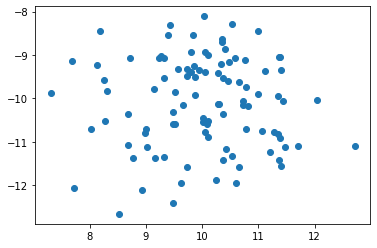

In [77]:
ss = sample_var(100,[10,-10,1])
plt.scatter(ss[:,0],ss[:,1])

In [110]:
optimize_elbo([np.random.multivariate_normal(np.zeros(2), np.eye(2), 1), 1], 1)

ValueError: solve: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (m,m),(m,n)->(m,n) (size 1 is different from 2)

In [114]:
np.concatenate(([1,2],[1]))

array([1, 2, 1])

In [20]:
log_model(1,0,1)

-1.4189385332046727

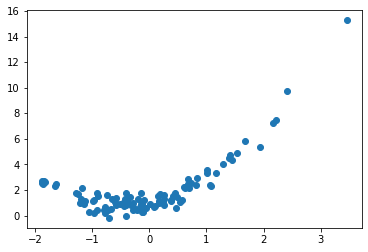

In [92]:
ss = np.random.multivariate_normal(np.zeros(2), [[1,0.9],[0.9,1]], 100)
plt.scatter(ss[:,0],ss[:,1]+ss[:,0]**2+1)